In [1]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [25]:
# Import required libraries to create the model
import json
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Import required libraries to load saved model
from tensorflow.keras.models import load_model

In [3]:
# Setting parameters for Tokenization and Padding process
vocab_size = 10000
embedding_dim = 16
max_length = 30
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"

In [4]:
# Loading data from json File
with open("/tmp/cleaned_data_en_4file.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []

# Creating data array
for item in datastore:
    sentences.append(item['text'])
    labels.append(item['viral'])

In [1]:
print("sentences: ", len(sentences))
print("labels", labels[1:10])

NameError: name 'sentences' is not defined

In [6]:
# Splitting Train & Test data in 80:20 ratio
training_size = 136055

training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [7]:
# Tokenizing Training Sentences
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
# Padding training sentences
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Tokenizing Test Sentences according to Training Data & padding it
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [8]:
# Converting Data to Numpy Array.
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [9]:
# Creating Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    # tf.keras.layers.Conv1D(64, 5, activation='relu'),
    # tf.keras.layers.GlobalAveragePooling1D(),
    # tf.keras.layers.Dense(24, activation='relu'),
    # tf.keras.layers.Dense(1, activation='sigmoid')
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Setting hyperparameter  
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss='binary_crossentropy',optimizer=sgd_optimizer,metrics=['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 16)            160000    
                                                                 
 bidirectional (Bidirectiona  (None, 30, 128)          41472     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 246,913
Trainable params: 246,913
Non-trai

In [11]:
# Let's Train
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
4252/4252 - 244s - loss: 0.5810 - accuracy: 0.7494 - val_loss: 0.5630 - val_accuracy: 0.7481 - 244s/epoch - 57ms/step
Epoch 2/30
4252/4252 - 225s - loss: 0.5611 - accuracy: 0.7496 - val_loss: 0.5620 - val_accuracy: 0.7481 - 225s/epoch - 53ms/step
Epoch 3/30
4252/4252 - 223s - loss: 0.5600 - accuracy: 0.7496 - val_loss: 0.5605 - val_accuracy: 0.7481 - 223s/epoch - 53ms/step
Epoch 4/30
4252/4252 - 224s - loss: 0.5581 - accuracy: 0.7496 - val_loss: 0.5578 - val_accuracy: 0.7481 - 224s/epoch - 53ms/step
Epoch 5/30
4252/4252 - 226s - loss: 0.5542 - accuracy: 0.7496 - val_loss: 0.5513 - val_accuracy: 0.7481 - 226s/epoch - 53ms/step
Epoch 6/30
4252/4252 - 224s - loss: 0.5429 - accuracy: 0.7496 - val_loss: 0.5291 - val_accuracy: 0.7481 - 224s/epoch - 53ms/step
Epoch 7/30
4252/4252 - 222s - loss: 0.5001 - accuracy: 0.7496 - val_loss: 0.4494 - val_accuracy: 0.7481 - 222s/epoch - 52ms/step
Epoch 8/30
4252/4252 - 223s - loss: 0.3927 - accuracy: 0.8436 - val_loss: 0.2583 - val_accuracy: 

In [26]:
# save model
model.save('/tmp/twitter_lstm_sgd_model.h5')
print('Model Saved!')

Model Saved!


INFO:tensorflow:Assets written to: /tmp/twitter_lstm_sgd_model/assets


INFO:tensorflow:Assets written to: /tmp/twitter_lstm_sgd_model/assets


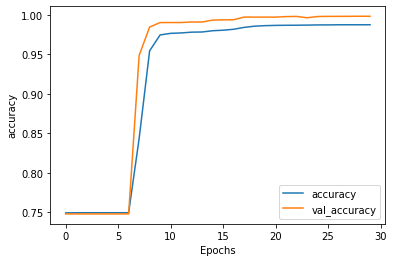

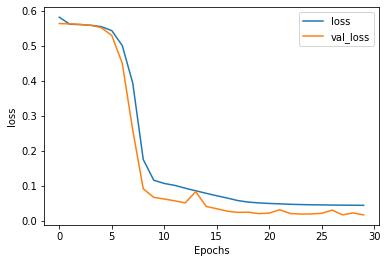

In [15]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

# Plotting Train & Validation Accuracy  
plot_graphs(history, "accuracy")

# Plotting Train & Validation Loss  
plot_graphs(history, "loss")

In [13]:
Text_1= "Yall couldnt impose a curfew, no REAL STRICT stay at home order for Corona but yall was SPEEDY with this eight p"

In [37]:
sentence = [Text_1]
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
score = (model.predict(padded))
print(score[0][0])

0.9961802


In [43]:
import nltk
nltk.download([
     "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
     "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",
 ])

[nltk_data] Downloading package names to /root/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to /root/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   

True

In [41]:
def get_virality(text):
  print(text)
  sentence = [Text_1]
  sequences = tokenizer.texts_to_sequences(sentence)
  padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
  score = (model.predict(padded))
  print(score[0][0])

def get_sentiment(text):
  print(text)
  from nltk.sentiment import SentimentIntensityAnalyzer
  sia = SentimentIntensityAnalyzer()
  a = sia.polarity_scores(text)
  print(a)

In [45]:
get_virality(Text_1)
get_sentiment(Text_1)

Yall couldnt impose a curfew, no REAL STRICT stay at home order for Corona but yall was SPEEDY with this eight p
0.9961802
{'neg': 0.0, 'neu': 0.862, 'pos': 0.138, 'compound': 0.2235}
